## Introduction 

In [2]:
import pandas as pd

In [4]:
ads = pd.read_csv(r'G:\My Drive\Projects\Marketing Data Science\advertising_ch2.csv', index_col = 'Date')
ads.head()

,Products,Web,Newspaper,Radio,TV
Date,,,,,
01/01/2018,Mobile,230100,69200,37800,22100
01/02/2018,Mobile,44500,45100,39300,10400
01/03/2018,Mobile,17200,69300,45900,9300
01/04/2018,Mobile,151500,58500,41300,18500
01/05/2018,Mobile,180800,58400,10800,12900


In [5]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 01/01/2018 to 07/06/2019
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Products   200 non-null    object
 1   Web        200 non-null    int64 
 2   Newspaper  200 non-null    int64 
 3   Radio      200 non-null    int64 
 4   TV         200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [6]:
ads.describe()

,Web,Newspaper,Radio,TV
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,30554.000000,23264.000000,14022.500000
std,85854.236315,21778.620839,14846.809176,5217.456566
min,700.000000,300.000000,0.000000,1600.000000
25%,74375.000000,12750.000000,9975.000000,10375.000000
50%,149750.000000,25750.000000,22900.000000,12900.000000
75%,218825.000000,45100.000000,36525.000000,17400.000000
max,296400.000000,114000.000000,49600.000000,27000.000000


In [7]:
ads['Products'].unique() #get the unique fields from the products col 

array(['Mobile', 'Electronics', 'Laptops'], dtype=object)

In [8]:
ads['Products'].value_counts() #how many rows for each value in the products col 

Mobile         129
Electronics     53
Laptops         18
Name: Products, dtype: int64

In [9]:
ads.groupby('Products')[['Web','Newspaper','Radio','TV']].sum() # get the sum of each column and group by products 

,Web,Newspaper,Radio,TV
Products,,,,
Electronics,7734400,1500100,1161200,698300
Laptops,2711700,379200,374000,257800
Mobile,18962400,4231500,3117600,1848400


In [15]:
ads.groupby('Products')[['Web']].sum() # can also just look at one column 

,Web
Products,
Electronics,7734400
Laptops,2711700
Mobile,18962400


<Axes: xlabel='Products'>

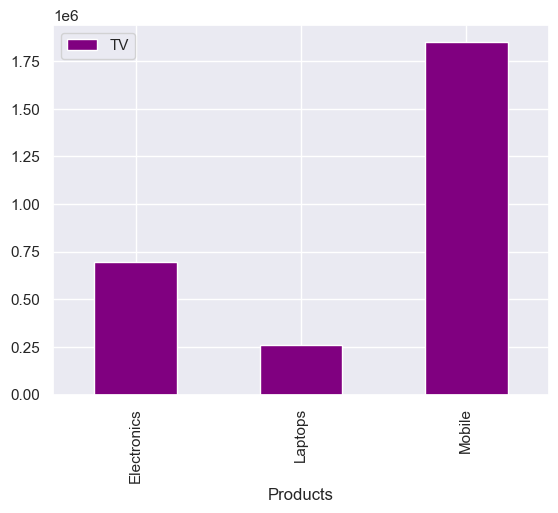

In [20]:
ads.groupby('Products').sum().plot(kind = 'bar', y = 'TV',color='purple')

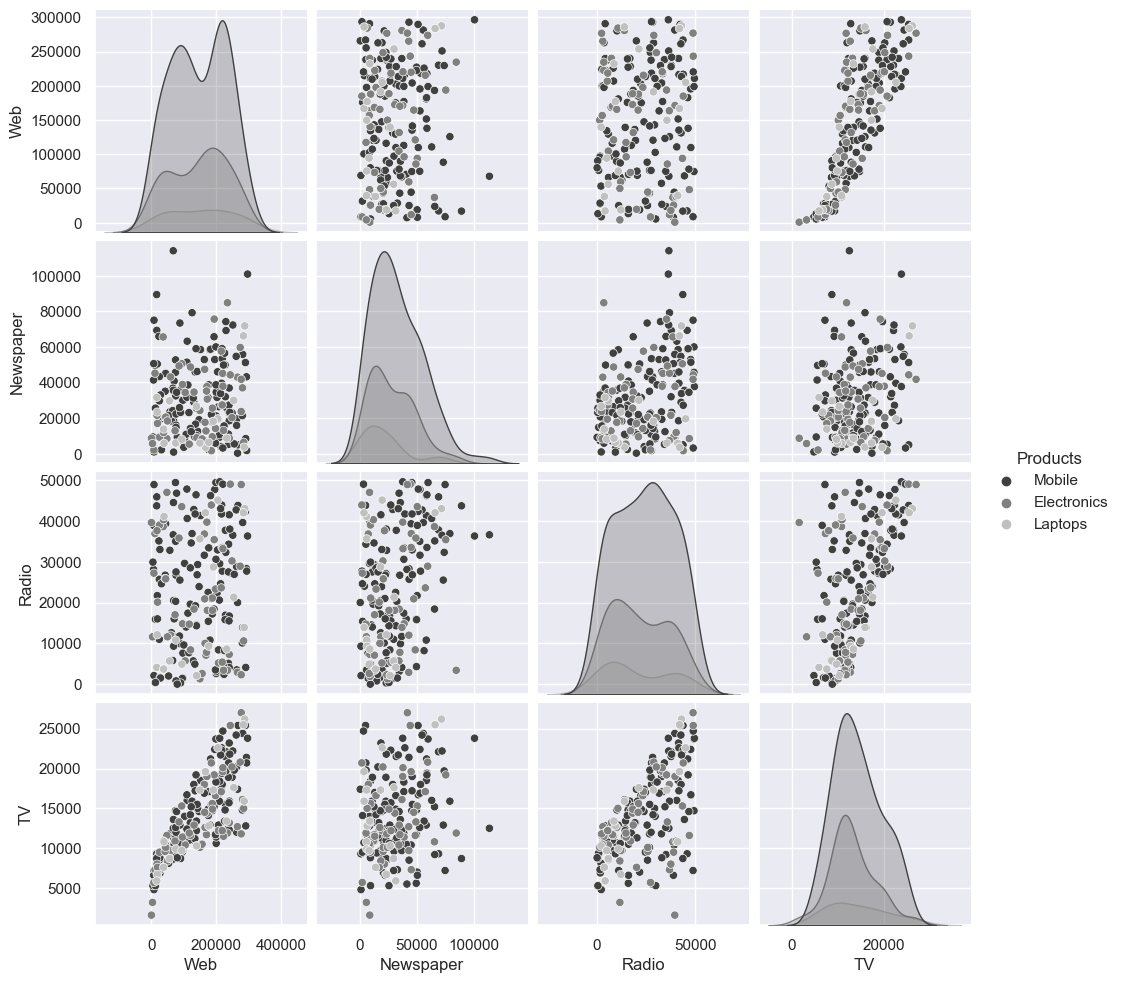

In [18]:
sns.pairplot(ads, hue='Products', palette='gray')

## 2.01 Exploring the attributes in sales data 

##### Functions that apply to the whole DF 
- `df.head()`
- `df.columns`
- `df.info()`
- `df.describe()`


##### Functions that apply to 1 or more columns 
- `df['col_name'].unique()`
- `df['col_name'].value_counts()`

In [13]:
sales = pd.read_csv(r'G:\My Drive\Projects\Marketing Data Science\sales_ch2.csv')
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
sales.columns

Index(['Year', 'Product line', 'Product type', 'Product', 'Order method type',
       'Retailer country', 'Revenue', 'Planned revenue', 'Product cost',
       'Quantity', 'Unit cost', 'Unit price', 'Gross profit',
       'Unit sale price'],
      dtype='object')

In [22]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17823 non-null  int64  
 1   Product line       17823 non-null  object 
 2   Product type       17823 non-null  object 
 3   Product            17823 non-null  object 
 4   Order method type  17823 non-null  object 
 5   Retailer country   17823 non-null  object 
 6   Revenue            6045 non-null   float64
 7   Planned revenue    6045 non-null   float64
 8   Product cost       6045 non-null   float64
 9   Quantity           5860 non-null   float64
 10  Unit cost          6045 non-null   float64
 11  Unit price         6045 non-null   float64
 12  Gross profit       6045 non-null   float64
 13  Unit sale price    6045 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB


In [23]:
sales['Year'].unique()

array([2004, 2005, 2006, 2007], dtype=int64)

In [24]:
sales['Product line'].unique()

array(['Golf Equipment', 'Camping Equipment', 'Outdoor Protection',
       'Mountaineering Equipment'], dtype=object)

In [25]:
sales['Product type'].unique()

array(['Golf Accessories', 'Sleeping Bags', 'Cooking Gear', 'First Aid',
       'Insect Repellents', 'Climbing Accessories'], dtype=object)

In [26]:
sales['Product'].unique()

array(['Course Pro Golf and Tee Set', 'Hibernator Self - Inflating Mat',
       'TrailChef Deluxe Cook Set', 'Deluxe Family Relief Kit',
       'Course Pro Golf Bag', 'TrailChef Water Bag',
       'TrailChef Kitchen Kit', 'TrailChef Cook Set',
       'TrailChef Single Flame', 'TrailChef Double Flame',
       'Hibernator Camp Cot', 'BugShield Lotion Lite',
       'Compact Relief Kit', 'Insect Bite Relief', 'Course Pro Umbrella',
       'Course Pro Gloves', 'Firefly Climbing Lamp',
       'Firefly Rechargeable Battery', 'Granite Chalk Bag',
       'TrailChef Canteen', 'TrailChef Cup', 'TrailChef Kettle',
       'TrailChef Utensils', 'Hibernator Lite', 'Hibernator Extreme',
       'Hibernator Pad', 'Hibernator Pillow', 'BugShield Natural',
       'BugShield Spray', 'BugShield Lotion', 'BugShield Extreme',
       'Calamine Relief', 'Aloe Relief', 'Granite Carabiner',
       'Granite Belay', 'Granite Pulley', 'Firefly Charger', 'Hibernator'],
      dtype=object)

In [27]:
sales.describe()

,Year,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
count,17823.000000,6.045000e+03,6.045000e+03,6.045000e+03,5860.000000,6045.000000,6045.000000,6.045000e+03,6045.000000
mean,2005.164955,1.038455e+05,1.058923e+05,5.701932e+04,4691.273549,58.882618,48.900855,4.336203e+04,44.795072
std,0.956260,1.836042e+05,1.881274e+05,1.117846e+05,8950.955313,348.369401,62.814500,7.185831e+04,58.399255
min,2004.000000,0.000000e+00,0.000000e+00,3.360000e+01,5.000000,0.850000,3.660000,-1.336560e+04,0.000000
25%,2004.000000,1.364924e+04,1.383736e+04,5.759760e+03,625.000000,2.760000,7.000000,7.009650e+03,6.580000
50%,2005.000000,4.154119e+04,4.189571e+04,1.906720e+04,1695.000000,9.000000,18.000000,1.894653e+04,17.650000
75%,2006.000000,1.120026e+05,1.144758e+05,5.796000e+04,4858.000000,34.970000,66.770000,5.002308e+04,62.760000
max,2007.000000,3.644349e+06,3.477910e+06,2.061750e+06,164142.000000,7833.000000,265.140000,1.416160e+06,265.140000


In [28]:
sales['Year'].value_counts()

2004    5451
2005    5451
2006    5451
2007    1470
Name: Year, dtype: int64

In [30]:
sales['Product line'].value_counts()

Camping Equipment           8562
Outdoor Protection          4410
Mountaineering Equipment    3087
Golf Equipment              1764
Name: Product line, dtype: int64

In [31]:
sales['Order method type'].value_counts()

Telephone      2547
Web            2547
Special        2547
Mail           2547
E-mail         2547
Fax            2547
Sales visit    2541
Name: Order method type, dtype: int64

#### Group By
df.groupby( ' Dimension_aggregate_column ' ) [['List', 'Columns', 'You', 'Want', 'Aggregated']].sum() 

In [32]:
sales.groupby('Retailer country')[['Revenue',\
                                   'Planned revenue',\
                                   'Product cost',\
                                   'Quantity',\
                                   'Gross profit']].sum()

,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Retailer country,,,,,
Australia,1.526422e+07,1.552855e+07,8367046.10,649467.0,6384806.59
Austria,1.631419e+07,1.663918e+07,8923176.61,719084.0,6871597.34
Belgium,1.415299e+07,1.434713e+07,7695759.79,622150.0,5964513.37
Brazil,1.686686e+07,1.718625e+07,9210809.34,744353.0,7092849.29
Canada,3.918371e+07,3.975547e+07,21435997.54,1701123.0,16670505.63
China,4.350234e+07,4.432347e+07,23925152.71,1935454.0,18003637.37
Denmark,8.455457e+06,8.657223e+06,4695594.80,368479.0,3496915.24
Finland,2.714528e+07,2.768705e+07,14879340.33,1207265.0,11335187.27
France,3.595367e+07,3.640336e+07,19646425.37,1620252.0,14968952.89


In [35]:
# 
sales.groupby('Retailer country')\
                      [['Revenue',\
                        'Planned revenue',\
                        'Product cost',\
                        'Quantity',\
                        'Unit cost',\
                        'Unit price',\
                        'Gross profit',\
                        'Unit sale price']].min()

,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Retailer country,,,,,,,,
Australia,0.0,294.00,120.78,49.0,0.85,3.66,-558.00,0.000000
Austria,0.0,0.00,33.60,5.0,0.85,3.66,-360.00,0.000000
Belgium,0.0,0.00,70.18,6.0,0.85,3.66,-280.72,0.000000
Brazil,966.0,966.00,455.63,138.0,0.85,3.66,510.37,3.192857
Canada,198.0,198.00,93.39,33.0,0.85,3.66,53.40,2.875000
China,0.0,618.00,291.49,103.0,0.85,3.66,-840.00,0.000000
Denmark,0.0,738.00,312.96,40.0,0.85,3.66,-2561.74,0.000000
Finland,486.0,486.00,223.56,81.0,0.85,3.66,262.44,3.141429
France,0.0,230.12,90.24,43.0,0.85,3.66,-190.40,0.000000


#### Other filtering using df.loc and df.iloc

In [39]:
# get rows where the retailer country = US for cols revenue, qty and GP 
sales.loc[sales['Retailer country'] == 'United States', ['Revenue', 'Quantity', 'Gross profit']].head(8)

,Revenue,Quantity,Gross profit
0,5819.70,619.0,4086.50
2,10904.28,1068.0,7913.88
4,NaN,NaN,NaN
63,159492.97,16137.0,114309.37
65,159040.72,15773.0,114876.32
67,NaN,NaN,NaN
69,0.00,62.0,-173.60
71,22472.21,2201.0,16309.41


In [41]:
# iloc selects and columns based on their indices 

sales.iloc[[0,1],[0,1,2]] 
# get the 1st 2 rows 
# and the 1st 3 columns 

,Year,Product line,Product type
0,2004,Golf Equipment,Golf Accessories
1,2004,Golf Equipment,Golf Accessories


In [47]:
# loc selects row and columns based on their label 
# .loc[rows, columns]
sales.loc[0:10,['Retailer country', 'Quantity']] 

,Retailer country,Quantity
0,United States,619.0
1,United Kingdom,NaN
2,United States,1068.0
3,United Kingdom,2712.0
4,United States,NaN
5,United Kingdom,839.0
6,Canada,NaN
7,Mexico,1372.0
8,Brazil,NaN
9,Japan,NaN


### rename a df column 
`df.rename({'old column name' : 'new column name'}, axis = 1)`

In [48]:
sales = sales.rename({'Revenue' : 'Earnings'}, axis = 1)
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Earnings,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.3 CTA Comparison - Shaping data with indexes

In [64]:
cta = pd.read_csv('G:\My Drive\Projects\Marketing Data Science\CTA_comparison_ch2.csv')
cta

,time,CTA Variant,views,sales
0,12:30:00,A,500,100
1,13:30:00,B,800,50
2,14:30:00,C,300,14
3,15:30:00,A,700,94
4,16:30:00,C,300,20
5,17:30:00,B,800,45
6,18:30:00,B,800,56
7,19:30:00,C,250,18
8,20:30:00,A,500,125


In [65]:
cta.set_index('CTA Variant') #adding one index 

,time,views,sales
CTA Variant,,,
A,12:30:00,500,100
B,13:30:00,800,50
C,14:30:00,300,14
A,15:30:00,700,94
C,16:30:00,300,20
B,17:30:00,800,45
B,18:30:00,800,56
C,19:30:00,250,18
A,20:30:00,500,125


In [66]:
cta.set_index(['CTA Variant', 'views']) #adding two indexes - variant = ad variant 

time  sales
CTA Variant views                 
A           500    12:30:00    100
B           800    13:30:00     50
C           300    14:30:00     14
A           700    15:30:00     94
C           300    16:30:00     20
B           800    17:30:00     45
            800    18:30:00     56
C           250    19:30:00     18
A           500    20:30:00    125

In [69]:
cta_views = cta.groupby(['CTA Variant', 'views']).count()
cta_views

# grouping by multiple columns to generate hierarchies
# creates a pivot table-like output that counts the number of occurances of both indices together 

time  sales
CTA Variant views             
A           500       2      2
            700       1      1
B           800       3      3
C           250       1      1
            300       2      2

In [68]:
# unstack(level) function removes the row hierarchy index with the col name provided or the innermost column index 
# (if no column is specified)

h1 = cta_views.unstack() 
h1

time                     sales                    
views        250  300  500  700  800   250  300  500  700  800
CTA Variant                                                   
A            NaN  NaN  2.0  1.0  NaN   NaN  NaN  2.0  1.0  NaN
B            NaN  NaN  NaN  NaN  3.0   NaN  NaN  NaN  NaN  3.0
C            1.0  2.0  NaN  NaN  NaN   1.0  2.0  NaN  NaN  NaN

In [71]:
# unstack(level) col name provided 
h1 = cta_views.unstack(level = 'CTA Variant') 
h1

time           sales          
CTA Variant    A    B    C     A    B    C
views                                     
250          NaN  NaN  1.0   NaN  NaN  1.0
300          NaN  NaN  2.0   NaN  NaN  2.0
500          2.0  NaN  NaN   2.0  NaN  NaN
700          1.0  NaN  NaN   1.0  NaN  NaN
800          NaN  3.0  NaN   NaN  3.0  NaN

In [72]:
# stack(level) function moves the column index with the name or the location level to the 
# innermost row index and by default moves the innermost col

# stack function has taken the sales and time col values to the row index and only the CTA Variant has become the col index
h1.stack(0)

CTA Variant    A    B    C
views                     
250   sales  NaN  NaN  1.0
      time   NaN  NaN  1.0
300   sales  NaN  NaN  2.0
      time   NaN  NaN  2.0
500   sales  2.0  NaN  NaN
      time   2.0  NaN  NaN
700   sales  1.0  NaN  NaN
      time   1.0  NaN  NaN
800   sales  NaN  3.0  NaN
      time   NaN  3.0  NaN

## Exercise 2.02 - Calculating Conversion Ratios for Website Ads

In [73]:
data = pd.read_csv('G:\My Drive\Projects\Marketing Data Science\conversion_rates_ch2.csv')
data

,converted,group
0,0,B
1,0,B
2,0,A
3,0,B
4,0,A
...,...,...
1995,0,B
1996,0,B
1997,0,A
1998,0,A


In [74]:
converted_df = data.groupby('group').sum()
converted_df

,converted
group,
A,90
B,21


In [80]:
viewed_df = data.groupby('group').count().rename({'converted' : 'viewed'}, axis = 'columns') # can also have axis = 1 
viewed_df

,viewed
group,
A,1030
B,970


In [82]:
# with inner joins you can leave out the how parameter (this is the default)
stats = converted_df.merge(viewed_df, on = 'group',  how = 'inner')
stats

,converted,viewed
group,,
A,90,1030
B,21,970


In [84]:
# calculate the conversion ratio by dividing converted / viewed 
stats['conversion_ratio'] = stats['converted'] / stats['viewed']
stats

,converted,viewed,conversion_ratio
group,,,
A,90,1030,0.087379
B,21,970,0.021649


In [90]:
# get columns as rows so we can take the index of what we need ['A']['conversion_ratio']
df = stats.stack()
df

group                  
A      converted             90.000000
       viewed              1030.000000
       conversion_ratio       0.087379
B      converted             21.000000
       viewed               970.000000
       conversion_ratio       0.021649
dtype: float64

In [91]:
df['A']['conversion_ratio']

0.08737864077669903

In [92]:
# bring the data back to its OG form and reverse the rows back to columns with unstack()
# one unstack brings the innermost index out one index 
stats.unstack()

                  group
converted         A          90.000000
                  B          21.000000
viewed            A        1030.000000
                  B         970.000000
conversion_ratio  A           0.087379
                  B           0.021649
dtype: float64

In [95]:
# two unstacks brings the innermost index out two indexes and to the columns (basically swapping the rows and columns)
stats.unstack().unstack()

group,A,B
converted,90.000000,21.000000
viewed,1030.000000,970.000000
conversion_ratio,0.087379,0.021649


## Visualizing Data

#### Format for pandas: 

`df [ 'column' ].plot( kind = 'which_kind', color = 'gray')`

`sales.groupby('Dimension_Column').sum().plot(kind='which_kind', y = 'Numeric Column', color='maroon')`

Kinds = `bar`, `kde`, `box`, `scatter`

In [98]:
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Earnings,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Density Plots (kde)
shows the distribution of a numeric variable

<Axes: ylabel='Density'>

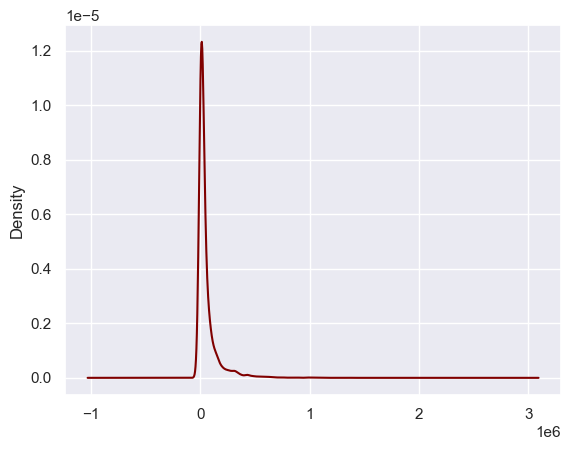

In [101]:
sales['Product cost'].plot(kind = 'kde', color = 'maroon')

### Bar Charts (bar)
display the distribution of categorical data

#### this does not work bc it is trying to plot every single product line on the x axis, also it doesnt know what numeric values to give it -- therefore, we need to group our data by the categories we want to see on the bottom 

`sales['Product line'].plot(kind='bar', color='maroon')`

C:\Users\emily.clark\AppData\Local\Temp\ipykernel_24316\3740182748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales.groupby('Product line').sum().plot(kind='bar', y = 'Planned revenue', color='maroon')


<Axes: xlabel='Product line'>

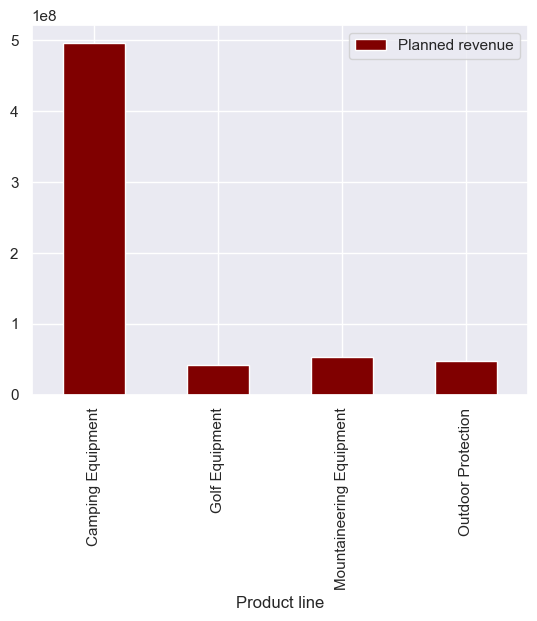

In [110]:
sales.groupby('Product line').sum().plot(kind='bar', y = 'Planned revenue', color='maroon')

Year
2004    Axes(0.125,0.11;0.775x0.77)
2005    Axes(0.125,0.11;0.775x0.77)
2006    Axes(0.125,0.11;0.775x0.77)
2007    Axes(0.125,0.11;0.775x0.77)
dtype: object

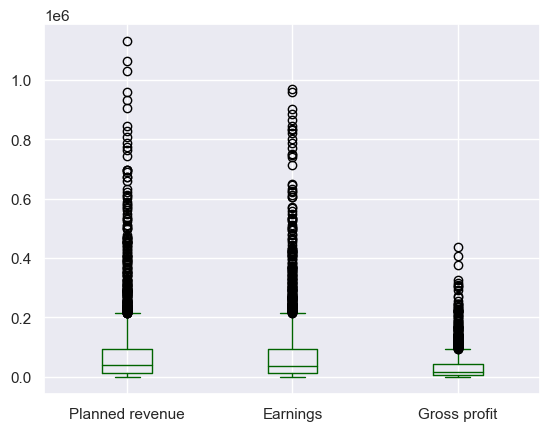

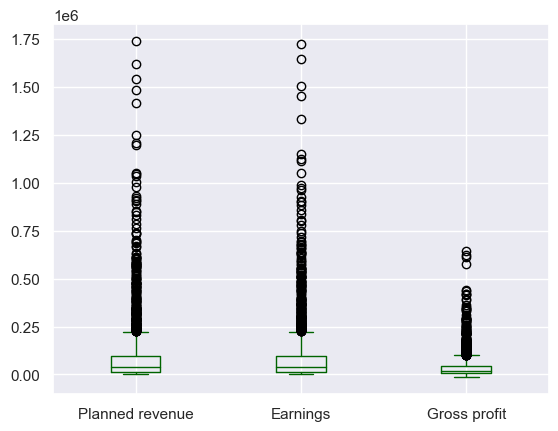

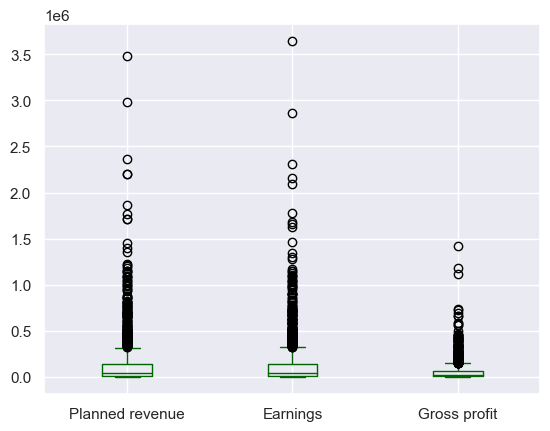

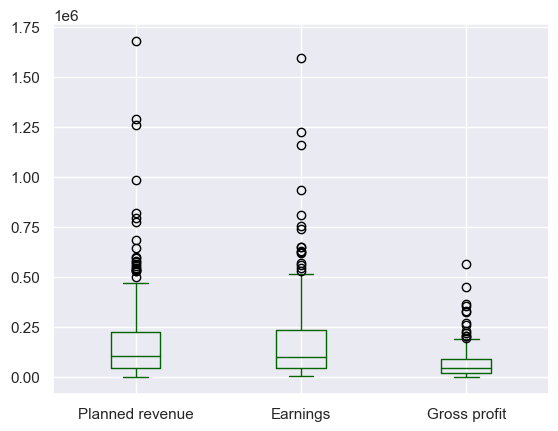

In [115]:
sales.groupby('Year')[['Planned revenue', 'Earnings', 'Gross profit']].plot(kind='box', color = 'darkgreen')

### Seaborn and creating histograms with `sns.displot`

`https://seaborn.pydata.org/tutorial.html`

In [116]:
import seaborn as sns
sns.set()

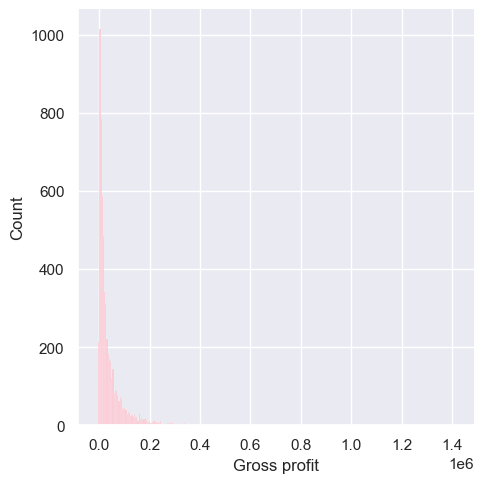

In [119]:
# creates a histogram and drops all NULL values so it doesnt mess up our distribution 
sns.displot(sales['Gross profit'].dropna(), color= 'pink')

### Pair Plots 
#### a collection of scatter plots between all possible numeric variables present in the dataset to understand the distribution

### `sns.pairplot(dataframe, palette='gray')`

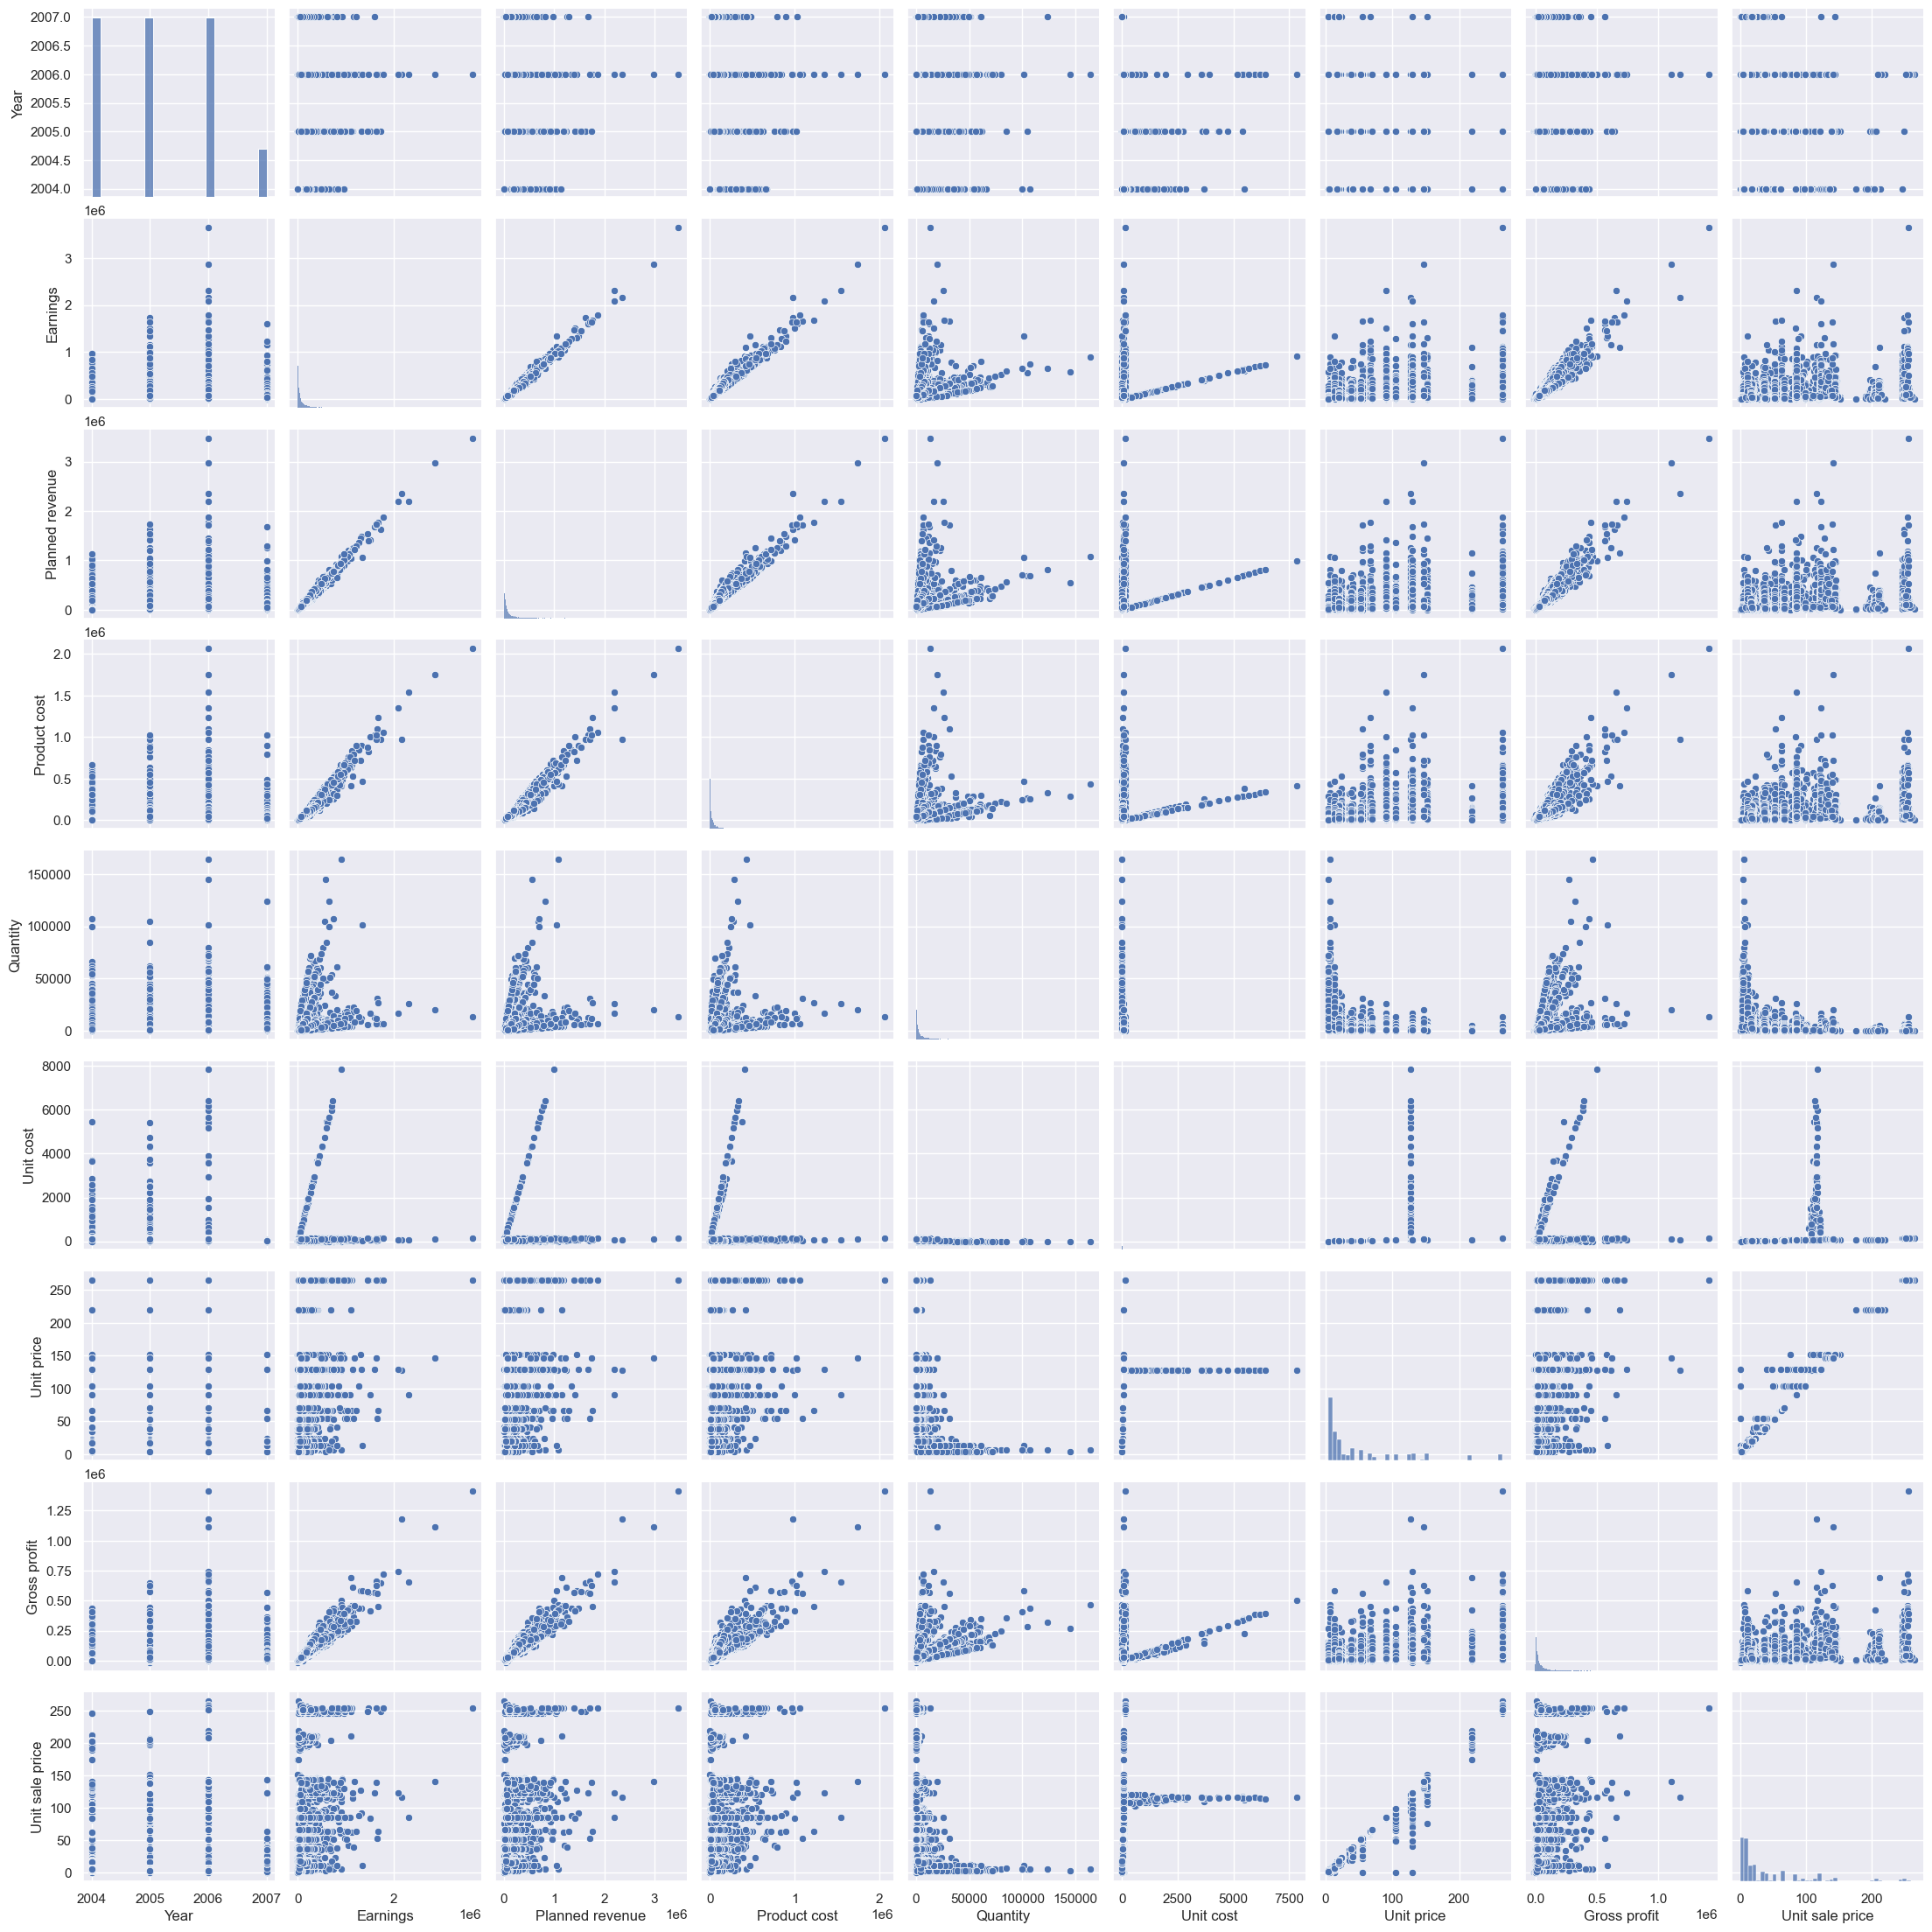

In [121]:
sns.pairplot(sales)

### Matplotlib

`plt.<function name>`

`xlabel, ylabel` - set the label for the x-axis, y-axis 

`xticks, yticks` - get or set the current tick locations and labels of the x-axis, y-axis 

`tick-params` - change the appearance of the ticks, tick labels and grid lines 

In [122]:
import matplotlib.pyplot as plt

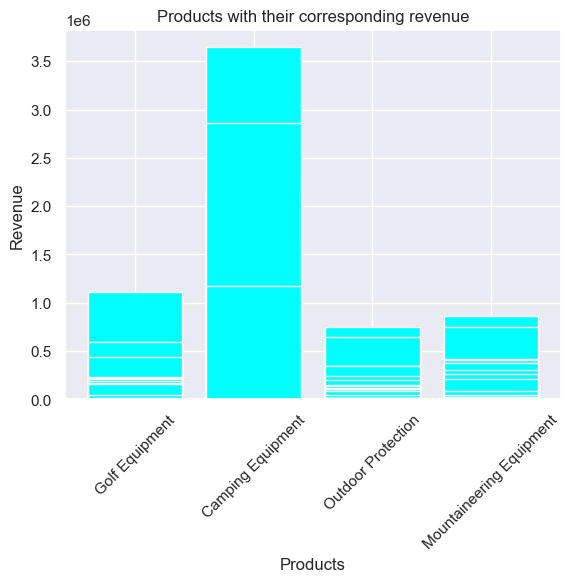

In [129]:
plt.bar(sales['Product line'], sales['Earnings'], color='cyan')
plt.title("Products with their corresponding revenue")
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.xticks(rotation = 45) # rotates x-axis lables by 45 degrees
plt.show()

## Chapter 2 - Lab Activity (Analyzing Ads)

In [130]:
ads

,Products,Web,Newspaper,Radio,TV
Date,,,,,
01/01/2018,Mobile,230100,69200,37800,22100
01/02/2018,Mobile,44500,45100,39300,10400
01/03/2018,Mobile,17200,69300,45900,9300
01/04/2018,Mobile,151500,58500,41300,18500
01/05/2018,Mobile,180800,58400,10800,12900
...,...,...,...,...,...
03/06/2019,Laptops,38200,13800,3700,7600
04/06/2019,Laptops,94200,8100,4900,9700
05/06/2019,Laptops,177000,6400,9300,12800


In [132]:
# What are the unique values present in the products column? 

ads.value_counts('Products')

Products
Mobile         129
Electronics     53
Laptops         18
dtype: int64

In [133]:
# what are the total views across all categories? 
ads.groupby('Products').sum()

,Web,Newspaper,Radio,TV
Products,,,,
Electronics,7734400,1500100,1161200,698300
Laptops,2711700,379200,374000,257800
Mobile,18962400,4231500,3117600,1848400


In [134]:
ads.sum()

Products     MobileMobileMobileMobileMobileMobileMobileMobi...
Web                                                   29408500
Newspaper                                              6110800
Radio                                                  4652800
TV                                                     2804500
dtype: object

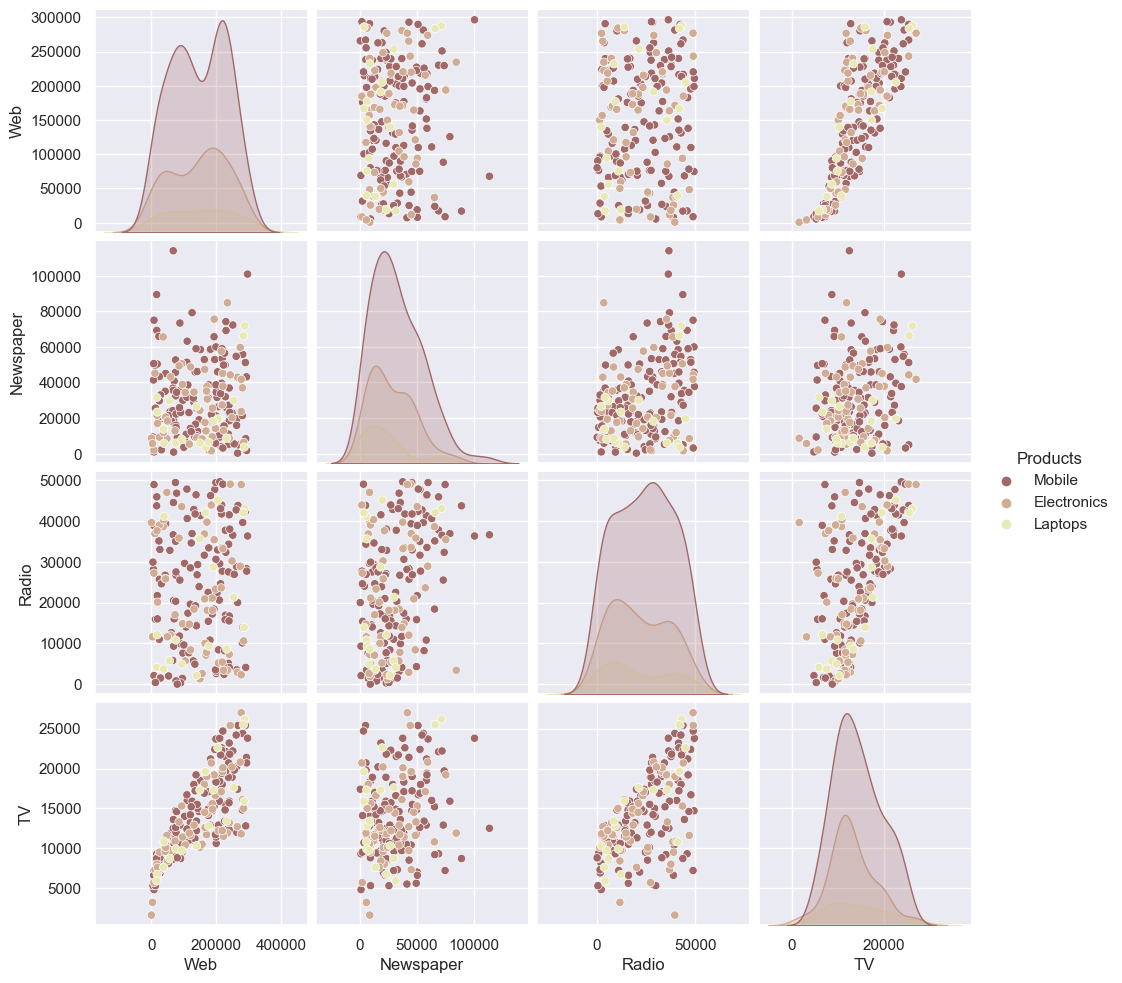

In [138]:
sns.pairplot(ads, hue='Products', palette='pink') ##added the dimension products to the visuals 